# Домашняя работа №5

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline


Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
                                                                       # следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2

In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

Коэффициент Пирсона равен: 0.8746179301164134


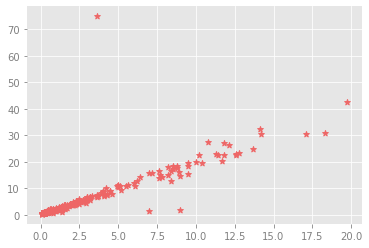

In [8]:
from scipy.stats import pearsonr
x = data['Direct_Bilirubin']
y = data['Total_Bilirubin']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='*')
print('Коэф-т Пирсона равен:', corr)

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [9]:
DB = np.array(data.Direct_Bilirubin).reshape(-1,1)
TB = np.array(data.Total_Bilirubin).reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    DB,
    TB,
    test_size = 0.2
)

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predicted_y = model.predict(X_test)

In [14]:
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

1.724858516278622
0.39518981471852727


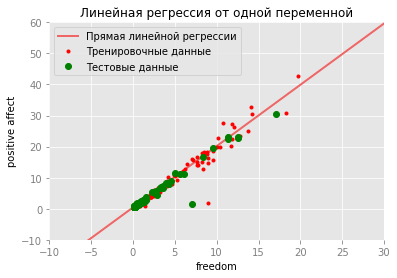

In [15]:
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title
('Лин-ая регрессия от одной переменной')
                                                             
# Построим прямую для регрессии и создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)

# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_

y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,30)
plt.ylim(-10,60)
plt.legend
(['Прямая лин-ой регрессии', 'Тренир-ые данные', 'Тест-ые данные'])
plt.show()

Посчитать квартили для всех **колонок**. 

In [16]:
crits= list(data)
# Получаем названия критериев 

crits.remove('Gender')
#Удаляем Gender, тк квартили можем определить только для числовых типов данных

for crit in crits:
    print("\n\nQ2 квантиль ряда "+crit+": ", np.quantile(data[crit], .50),
          "\nQ1 квантиль ряда "+crit+ ": ", np.quantile(data[crit], .25),
          "\nQ3 квантиль ряда "+crit+ ": ", np.quantile(data[crit], .75),
          "\n10 квантиль ряда "+crit+ ": ", np.quantile(data[crit], .1)) 



Q2 квантиль ряда Age:  45.0 
Q1 квантиль ряда Age:  33.0 
Q3 квантиль ряда Age:  58.0 
10 квантиль ряда Age:  23.0


Q2 квантиль ряда Total_Bilirubin:  1.0 
Q1 квантиль ряда Total_Bilirubin:  0.8 
Q3 квантиль ряда Total_Bilirubin:  2.6 
10 квантиль ряда Total_Bilirubin:  0.7


Q2 квантиль ряда Direct_Bilirubin:  0.3 
Q1 квантиль ряда Direct_Bilirubin:  0.2 
Q3 квантиль ряда Direct_Bilirubin:  1.3 
10 квантиль ряда Direct_Bilirubin:  0.1


Q2 квантиль ряда Alkaline_Phosphotase:  208.0 
Q1 квантиль ряда Alkaline_Phosphotase:  175.5 
Q3 квантиль ряда Alkaline_Phosphotase:  298.0 
10 квантиль ряда Alkaline_Phosphotase:  150.0


Q2 квантиль ряда Alamine_Aminotransferase:  35.0 
Q1 квантиль ряда Alamine_Aminotransferase:  23.0 
Q3 квантиль ряда Alamine_Aminotransferase:  60.5 
10 квантиль ряда Alamine_Aminotransferase:  18.0


Q2 квантиль ряда Aspartate_Aminotransferase:  42.0 
Q1 квантиль ряда Aspartate_Aminotransferase:  25.0 
Q3 квантиль ряда Aspartate_Aminotransferase:  87.0 
10 кванти

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Среднее для людей моложе 50= 1.4877659574468085 
Квартиль 0.5= 0.3
Среднее для людей старше 50= 1.4830917874396135 
Квартиль 0.5= 0.4


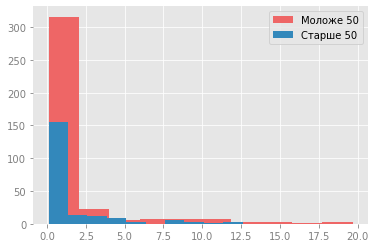

In [17]:
dataframe=data[data['Age']<=50]
print("Среднее для людей моложе 50=",statistics.mean(dataframe['Direct_Bilirubin']),
      "\nКвартиль 0.5=", dataframe['Direct_Bilirubin'].quantile(0.5))
plt.hist(dataframe['Direct_Bilirubin'],bins=10,label='Моложе 50')


dataframe=data[data['Age']>50]
print("Среднее для людей старше 50=",statistics.mean(dataframe['Direct_Bilirubin']),
      "\nКвартиль 0.5=", dataframe['Direct_Bilirubin'].quantile(0.5))
plt.hist(dataframe['Direct_Bilirubin'],bins=10,label='Старше 50')

plt.legend()
plt.show()

In [18]:
dataframe=data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(dataframe, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

t-value = 2.471063305746647, сравниваем данное значение с табличным значением 2.00 (или число от 1.97 до 2, так как нет 96 в таблице) (alpha = 0.05, N=95). 
Так как значение t-value превышает 1.97, нулевую гипотезу мы не принимаем.
Также можно оценивать p-value. Вероятность получить данное значение (или выше) t при условии, что проверяемая нулевая гипотеза верна, оказалась прилична: p-value = 0.013 (это меньше 5%)
p-value равно 0.013, что меньше стандартной альфа ошибки 0.05, поэтому мы отклоняем нулевую гипотезу и можем сказать, что существует статистическое различие между Сумарным Билирубином и генеральной совокупности в целом.

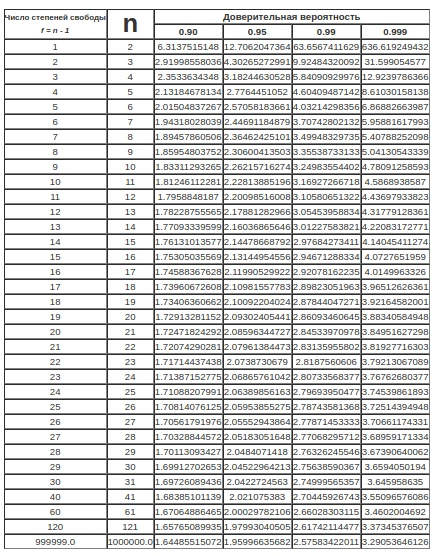

In [3]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [19]:
ill_people=data[data['Dataset']==1]['Total_Bilirubin']

health_people=data[data['Dataset']==2]['Total_Bilirubin']

print(stats.ttest_ind(ill_people, health_people))

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


p-value равно 7е-08, что намного меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется существенное статистическое различие между показателями Билирубина у больных и здоровых людей.

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [20]:
first=data[data['Age']<=30]['Dataset']

second=data[data['Age']<=55]
second=second[second['Age']>30]['Dataset']

third=data[data['Age']>55]['Dataset']

stats.f_oneway(first, second, third)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Молодые люди меньше болееют, чем людьми 55+ , а также меньше чем люди среднего возраста.Очевидно, что группы имеют отличия.
Именно это и доказывают значения t-value и p-value, которые мы видим в расчете.